In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from ma_triple import get_data,Strategy
# plt.style.use('seaborn')
df_dict = {}

In [3]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
               'XRP','DYDX','AVAX','LINK','GAS',
               'DOGE','ORDI','TRB','WLD','ADA',
               'OP','FIL','ZRX','LTC','RUNE','ATOM',
               'ARB','GMT','ETC','ARK','BCH','DOT',
               'LDO','SUI','GALA','CAKE',
               'APE','INJ','FTM','APT','YFI','OMG',
               'SEI','EOS','1000SHIB','NEAR',
               'MKR','CYBER','UNI',
               'BLUR','SUSHI','WAVES','MASK','MANA',
               'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')

APY: 237.79 %
MDD: 13.53 %
MDD Duration 205 days 00:45:00
worst trade: -10.14 %
2022-11-08 16:20:00 ~ 2022-11-08 18:25:00
avg holding days: 0.19 days
--------------------------------------------
PF: 1.43
Sharpe Ratio: 3.15
Calmar Ratio: 10.82
Sortino Ratio: 4.64
Omega Ratio: 1.06
--------------------------------------------
Expectancy : 0.27 %
Total Time Exposure : 45.80 %
Total Trades: 1638
Win Rate: 38.22 %
--------------------------------------------
PF * Win Rate: 0.545


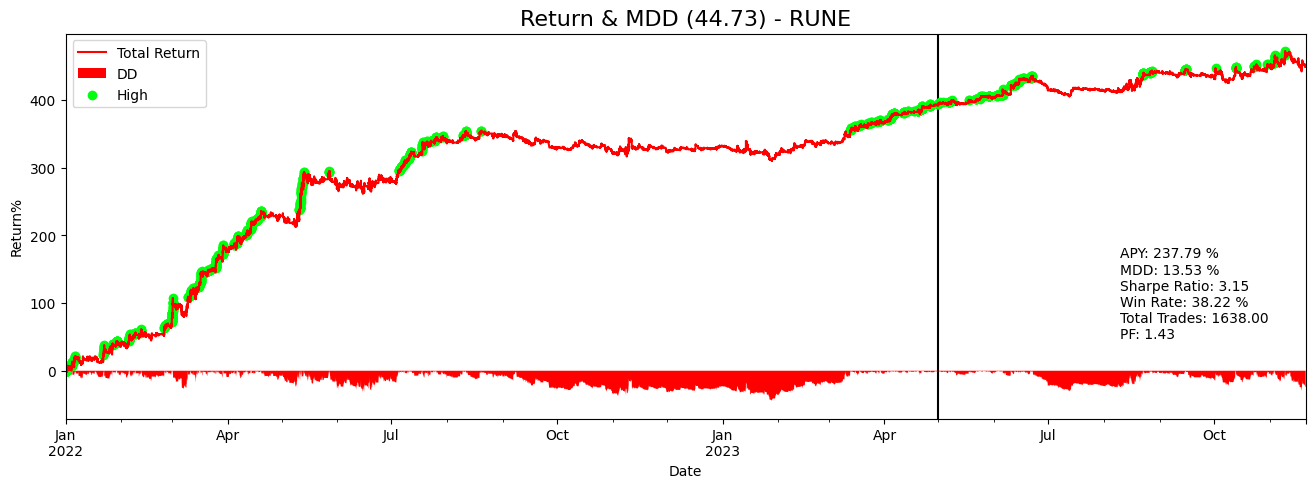

(None,
 Start                               2022-01-01 00:00:00
 End                                 2023-11-21 01:00:00
 Period                                689 days 01:05:00
 Start Value                                     10000.0
 Min Value                                   9836.229308
 Max Value                                  57239.984947
 End Value                                  54886.827121
 Total Return [%]                             448.868271
 Benchmark Return [%]                         -23.162682
 Total Time Exposure [%]                       45.803119
 Max Gross Exposure [%]                       103.165212
 Max Drawdown [%]                              13.528616
 Max Drawdown Duration                 205 days 00:45:00
 Total Orders                                       2830
 Total Fees Paid                             9826.624772
 Total Trades                                       1638
 Win Rate [%]                                  38.217338
 Best Trade [%]         

In [7]:
start = '2022-01-01'
sep = ''
end = ''

params = {"short_window": 20,
        "middle_window": 52,
        "long_window": 40}

side = 'both'
config = {'freq':'5min', 'lag':1, 'fee': 0.0003,'weekend_filter':False}
coin = 'RUNE'

# 5m : RUNE{"short_window": 20,"middle_window": 56,"long_window": 32}both
# 5m : RUNE{"short_window": 44,"middle_window": 44,"long_window": 44}long
# 15m : AVAX{"short_window": 44,"middle_window": 44,"long_window": 44}short
# 15m : RUNE{"short_window": 12,"middle_window": 12,"long_window": 18}long
# 1h : INJ{"short_window": 32,"middle_window": 12,"long_window": 56}long
# 4h : INJ{"short_window": 20,"middle_window": 8,"long_window": 56}long


df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

In [6]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['RUNE']
sample_sets = [[start,end]]
# freq = '1h'

params = {"short_window": [4,40,4],
        "middle_window":[4,60,4],
        "long_window": [4,60,4]}
    
config = {'freq':'5T','fee': 0.0003,'weekend_filter':False}
multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    df_dict=df_dict,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)


======================= RUNE BOTH Optimize Test =======================
Optimization trails: 1764


100%|██████████| 1764/1764 [01:51<00:00, 15.76it/s]


Optimization time: 113.4 sec
---------- RUNE BOTH ----------
{'short_window': 20, 'middle_window': 52, 'long_window': 40}
+------------+-----------+----------+-----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |      毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+-----------+------------+---------+------------|
| 2022-03    |    176.08 | 34093.5  | -16491.8  |       2.07 |   41.62 |        197 |
| 2022-06    |    105.85 | 30714.7  | -20129.8  |       1.53 |   41.67 |        204 |
| 2022-09    |     46.59 | 18734.2  | -14074.9  |       1.33 |   41.18 |        204 |
| 2022-12    |      3.5  | 12229.5  | -11879.7  |       1.03 |   35.47 |        203 |
| 2023-03    |     36.16 | 15981.2  | -12365.1  |       1.29 |   34.17 |        240 |
| 2023-06    |     27.47 |  4510.69 |  -1763.46 |       2.56 |   50    |         58 |
+------------+-----------+----------+-----------+------------+---------+------------+
